In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# /kaggle/input/ch-26-mnit-jaipur/train.parquet
# /kaggle/input/ch-26-mnit-jaipur/sample_submission.parquet
# /kaggle/input/ch-26-mnit-jaipur/test.parquet
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ch-26-mnit-jaipur/train.parquet
/kaggle/input/ch-26-mnit-jaipur/sample_submission.parquet
/kaggle/input/ch-26-mnit-jaipur/test.parquet


In [2]:
!pip uninstall -y scikit-learn imbalanced-learn
!pip install --no-cache-dir scikit-learn==1.2.2 imbalanced-learn==0.10.1



Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: imbalanced-learn 0.13.0
Uninstalling imbalanced-learn-0.13.0:
  Successfully uninstalled imbalanced-learn-0.13.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 279.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


In [3]:
import sklearn
import imblearn
print("scikit-learn version:", sklearn.__version__)
print("imbalanced-learn version:", imblearn.__version__)


scikit-learn version: 1.2.2
imbalanced-learn version: 0.10.1


In [4]:
# training set 
df=pd.read_parquet("/kaggle/input/ch-26-mnit-jaipur/train.parquet")
df


,Date,X1,X2,X3,X4,X5,target
0,2020-12-16,1.518921,5.463154,1.0,2.718282,2.890372,0
1,2020-12-16,1.546509,5.458010,1.0,2.718282,2.833213,1
2,2020-12-16,1.645427,5.456560,1.0,7.389056,2.890372,1
3,2020-12-16,1.652022,5.458479,1.0,2.718282,2.890372,1
4,2020-12-16,1.695538,5.466709,1.0,2.718282,2.890372,0
...,...,...,...,...,...,...,...
1639419,2024-11-26,1.000000,5.482346,1.0,1.000000,0.000000,0
1639420,2024-11-26,1.000000,5.486580,1.0,1.000000,0.000000,0
1639421,2024-11-26,1.000000,5.484797,1.0,1.000000,0.000000,0
1639422,2024-11-26,1.000000,5.483551,1.0,1.000000,0.000000,0


In [5]:
df=df.head(40000)
df

,Date,X1,X2,X3,X4,X5,target
0,2020-12-16,1.518921,5.463154,1.000000e+00,2.718282,2.890372,0
1,2020-12-16,1.546509,5.458010,1.000000e+00,2.718282,2.833213,1
2,2020-12-16,1.645427,5.456560,1.000000e+00,7.389056,2.890372,1
3,2020-12-16,1.652022,5.458479,1.000000e+00,2.718282,2.890372,1
4,2020-12-16,1.695538,5.466709,1.000000e+00,2.718282,2.890372,0
...,...,...,...,...,...,...,...
39995,2021-01-20,1.786038,5.459160,3.185593e+16,7.389056,0.000000,0
39996,2021-01-20,1.778909,5.458947,1.171914e+16,2.718282,0.000000,0
39997,2021-01-20,1.771807,5.458138,1.171914e+16,2.718282,0.000000,0
39998,2021-01-20,1.778909,5.462008,3.185593e+16,7.389056,0.000000,0


In [6]:
test=pd.read_parquet("/kaggle/input/ch-26-mnit-jaipur/test.parquet")


test
test.isna().sum()
test

,ID,Date,X1,X2,X3,X4,X5
0,0,2020-12-16,1.685395,5.463917,1.0,7.389056,2.890372
1,1,2020-12-16,1.488844,5.454936,1.0,7.389056,2.890372
2,2,2020-12-16,1.164160,5.471136,1.0,1.000000,2.890372
3,3,2020-12-16,1.000000,5.467385,1.0,1.000000,2.890372
4,4,2020-12-16,1.000000,5.453995,1.0,1.000000,2.833213
...,...,...,...,...,...,...,...
409851,409851,2024-11-26,1.120752,5.483053,1.0,2.718282,0.000000
409852,409852,2024-11-26,1.096365,5.477802,1.0,7.389056,0.000000
409853,409853,2024-11-26,1.111822,5.479972,1.0,2.718282,0.000000
409854,409854,2024-11-26,1.000000,5.486165,1.0,1.000000,0.000000


In [7]:
df.info() #datattype of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    40000 non-null  datetime64[ns]
 1   X1      40000 non-null  float64       
 2   X2      40000 non-null  float64       
 3   X3      40000 non-null  float64       
 4   X4      40000 non-null  float64       
 5   X5      40000 non-null  float64       
 6   target  40000 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 2.1+ MB


In [8]:
df.describe()

,Date,X1,X2,X3,X4,X5
count,40000,40000.000000,40000.000000,4.000000e+04,4.000000e+04,40000.000000
mean,2021-02-27 00:34:31.440000256,1.154371,5.488993,1.300221e+29,5.795628e+29,1.199735
min,2020-12-16 00:00:00,1.000000,5.428468,1.000000e+00,1.000000e+00,0.000000
25%,2020-12-25 00:00:00,1.000000,5.479096,1.000000e+00,1.000000e+00,0.000000
50%,2021-01-14 00:00:00,1.134282,5.490135,1.000000e+00,1.000000e+00,0.000000
75%,2021-04-01 00:00:00,1.223848,5.499420,1.000000e+00,2.718282e+00,2.890372
max,2021-12-01 00:00:00,2.367892,5.532163,2.758513e+33,7.498417e+33,3.044522
std,NaN,0.147090,0.014792,1.565923e+31,4.474334e+31,1.434007


In [9]:
df.isna().sum() #number of null values

Date      0
X1        0
X2        0
X3        0
X4        0
X5        0
target    0
dtype: int64

In [10]:
df.nunique #to know number of unique values in each column

<bound method DataFrame.nunique of             Date        X1        X2            X3        X4        X5 target
0     2020-12-16  1.518921  5.463154  1.000000e+00  2.718282  2.890372      0
1     2020-12-16  1.546509  5.458010  1.000000e+00  2.718282  2.833213      1
2     2020-12-16  1.645427  5.456560  1.000000e+00  7.389056  2.890372      1
3     2020-12-16  1.652022  5.458479  1.000000e+00  2.718282  2.890372      1
4     2020-12-16  1.695538  5.466709  1.000000e+00  2.718282  2.890372      0
...          ...       ...       ...           ...       ...       ...    ...
39995 2021-01-20  1.786038  5.459160  3.185593e+16  7.389056  0.000000      0
39996 2021-01-20  1.778909  5.458947  1.171914e+16  2.718282  0.000000      0
39997 2021-01-20  1.771807  5.458138  1.171914e+16  2.718282  0.000000      0
39998 2021-01-20  1.778909  5.462008  3.185593e+16  7.389056  0.000000      0
39999 2021-01-20  1.778909  5.464255  1.171914e+16  2.718282  0.000000      0

[40000 rows x 7 columns]>

In [11]:
df["target"].unique()
#to know number of classes hence its a binary classification

array(['0', '1'], dtype=object)

In [12]:
import seaborn as sns
from matplotlib import pyplot as plt

In [13]:

df.drop('Date', axis=1)



,X1,X2,X3,X4,X5,target
0,1.518921,5.463154,1.000000e+00,2.718282,2.890372,0
1,1.546509,5.458010,1.000000e+00,2.718282,2.833213,1
2,1.645427,5.456560,1.000000e+00,7.389056,2.890372,1
3,1.652022,5.458479,1.000000e+00,2.718282,2.890372,1
4,1.695538,5.466709,1.000000e+00,2.718282,2.890372,0
...,...,...,...,...,...,...
39995,1.786038,5.459160,3.185593e+16,7.389056,0.000000,0
39996,1.778909,5.458947,1.171914e+16,2.718282,0.000000,0
39997,1.771807,5.458138,1.171914e+16,2.718282,0.000000,0
39998,1.778909,5.462008,3.185593e+16,7.389056,0.000000,0


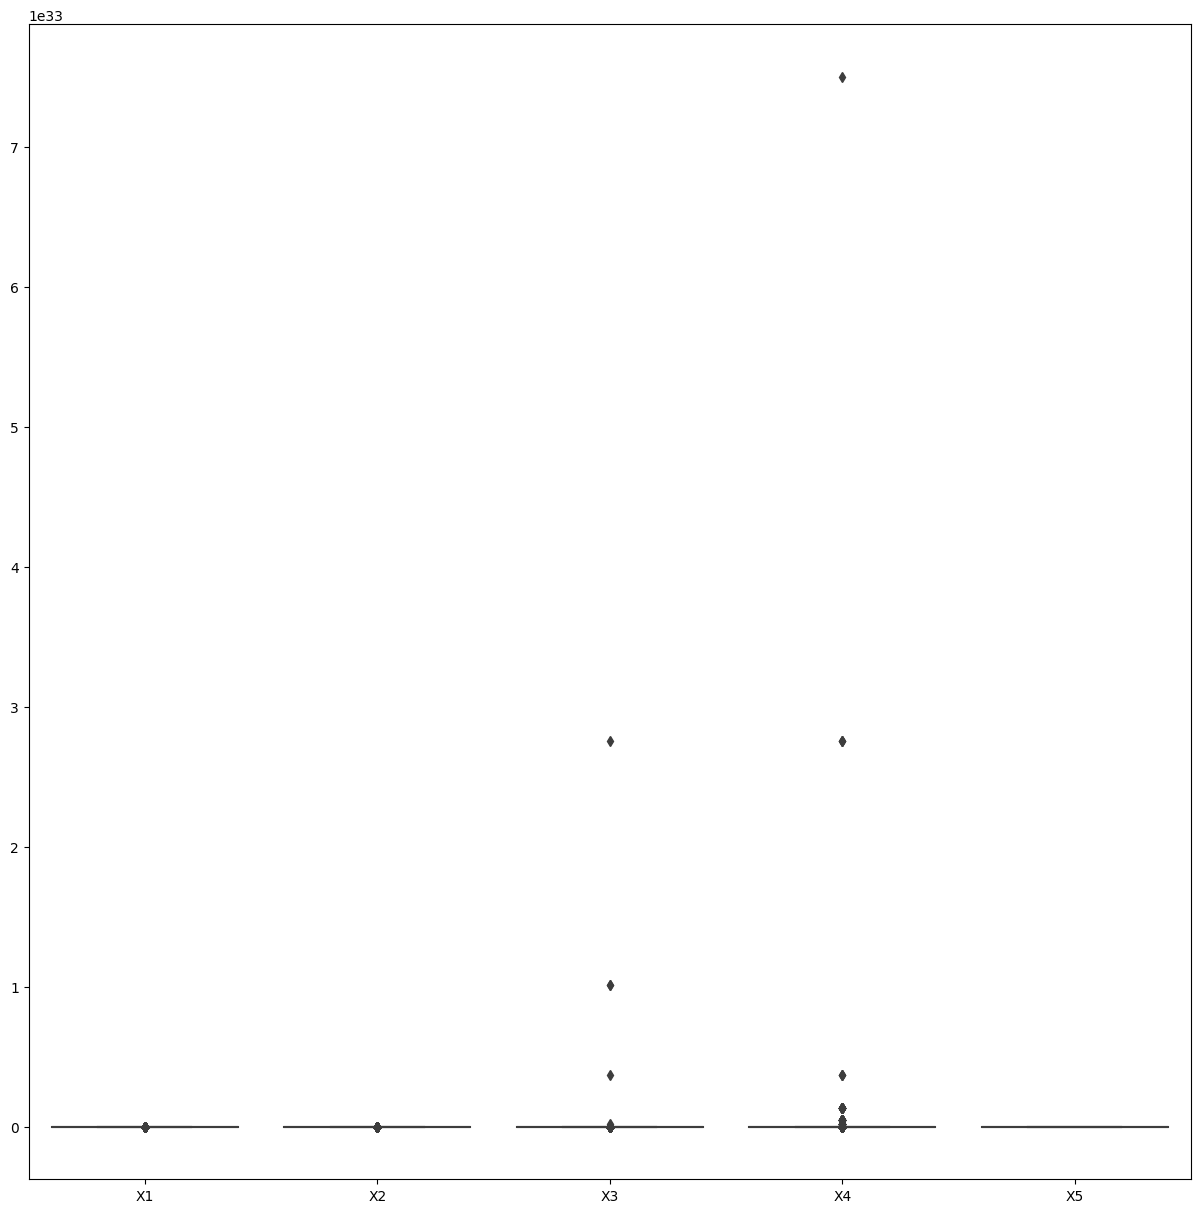

In [14]:
fig, ax = plt.subplots(figsize=(15,15))
sns.boxplot(data = df, ax=ax)
plt.savefig("boxPlot.jpg")

In [15]:
df.corr()

,Date,X1,X2,X3,X4,X5,target
Date,1.000000,0.047920,-0.044853,-0.005263,-0.002473,0.010720,-0.017068
X1,0.047920,1.000000,-0.153479,0.010960,0.008999,0.086875,0.104233
X2,-0.044853,-0.153479,1.000000,-0.007454,-0.006605,-0.444038,-0.268029
X3,-0.005263,0.010960,-0.007454,1.000000,-0.000108,-0.006823,0.056049
X4,-0.002473,0.008999,-0.006605,-0.000108,1.000000,0.015046,0.086197
X5,0.010720,0.086875,-0.444038,-0.006823,0.015046,1.000000,0.134135
target,-0.017068,0.104233,-0.268029,0.056049,0.086197,0.134135,1.000000


In [16]:
## Split the data into independent and dependent features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
## Split the data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
x_test.info()
x_train.info()
y_train.info()
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12000 entries, 32823 to 1380
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    12000 non-null  datetime64[ns]
 1   X1      12000 non-null  float64       
 2   X2      12000 non-null  float64       
 3   X3      12000 non-null  float64       
 4   X4      12000 non-null  float64       
 5   X5      12000 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 656.2 KB
<class 'pandas.core.frame.DataFrame'>
Index: 28000 entries, 38015 to 15795
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    28000 non-null  datetime64[ns]
 1   X1      28000 non-null  float64       
 2   X2      28000 non-null  float64       
 3   X3      28000 non-null  float64       
 4   X4      28000 non-null  float64       
 5   X5      28000 non-null  float64       
dtypes: datetime64[ns]

In [17]:
# Force y_train to be a DataFrame with column "target"
y_train = pd.DataFrame(y_train).reset_index(drop=True)
y_train.columns = ["target"]

# Now check
print(y_train.head())
print(y_train.shape)


  target
0      0
1      0
2      0
3      0
4      0
(28000, 1)


In [18]:
# overwrite x_train without Date
x_train = x_train.drop(columns=['Date'])


# now check
x_train.info()
y_train


<class 'pandas.core.frame.DataFrame'>
Index: 28000 entries, 38015 to 15795
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      28000 non-null  float64
 1   X2      28000 non-null  float64
 2   X3      28000 non-null  float64
 3   X4      28000 non-null  float64
 4   X5      28000 non-null  float64
dtypes: float64(5)
memory usage: 1.3 MB


,target
0,0
1,0
2,0
3,0
4,0
...,...
27995,0
27996,0
27997,0
27998,0


In [19]:
x_test = x_test.drop(columns=['Date'])


# now check
x_test.info()
x_test.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 12000 entries, 32823 to 1380
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      12000 non-null  float64
 1   X2      12000 non-null  float64
 2   X3      12000 non-null  float64
 3   X4      12000 non-null  float64
 4   X5      12000 non-null  float64
dtypes: float64(5)
memory usage: 562.5 KB


X1    0
X2    0
X3    0
X4    0
X5    0
dtype: int64

In [20]:
x_test

,X1,X2,X3,X4,X5
32823,1.256085,5.490342,1.0,7.389056,0.000000
16298,1.168826,5.456901,1.0,1.000000,2.833213
28505,1.074655,5.478261,1.0,1.000000,2.890372
6689,1.307347,5.491579,1.0,1.000000,0.000000
26893,1.164160,5.490094,1.0,1.000000,0.000000
...,...,...,...,...,...
3779,1.000000,5.508619,1.0,1.000000,0.000000
11973,1.051271,5.522141,1.0,1.000000,0.000000
35668,1.453537,5.494583,1.0,7.389056,2.944439
483,1.091988,5.506063,1.0,1.000000,0.000000


In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler





# 🔹 Select only numeric columns for scaling
numeric_features = x_train.select_dtypes(include=[np.number]).columns

scaler = StandardScaler()

# Fit on train numeric columns
X_train_norm = x_train.copy()
X_test_norm = x_test.copy()

X_train_norm[numeric_features] = scaler.fit_transform(x_train[numeric_features])
X_test_norm[numeric_features]  = scaler.transform(x_test[numeric_features])

print("Train shape:", X_train_norm.shape)
print("Test shape:", X_test_norm.shape)
X_test_norm.info()


Train shape: (28000, 5)
Test shape: (12000, 5)
<class 'pandas.core.frame.DataFrame'>
Index: 12000 entries, 32823 to 1380
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      12000 non-null  float64
 1   X2      12000 non-null  float64
 2   X3      12000 non-null  float64
 3   X4      12000 non-null  float64
 4   X5      12000 non-null  float64
dtypes: float64(5)
memory usage: 562.5 KB


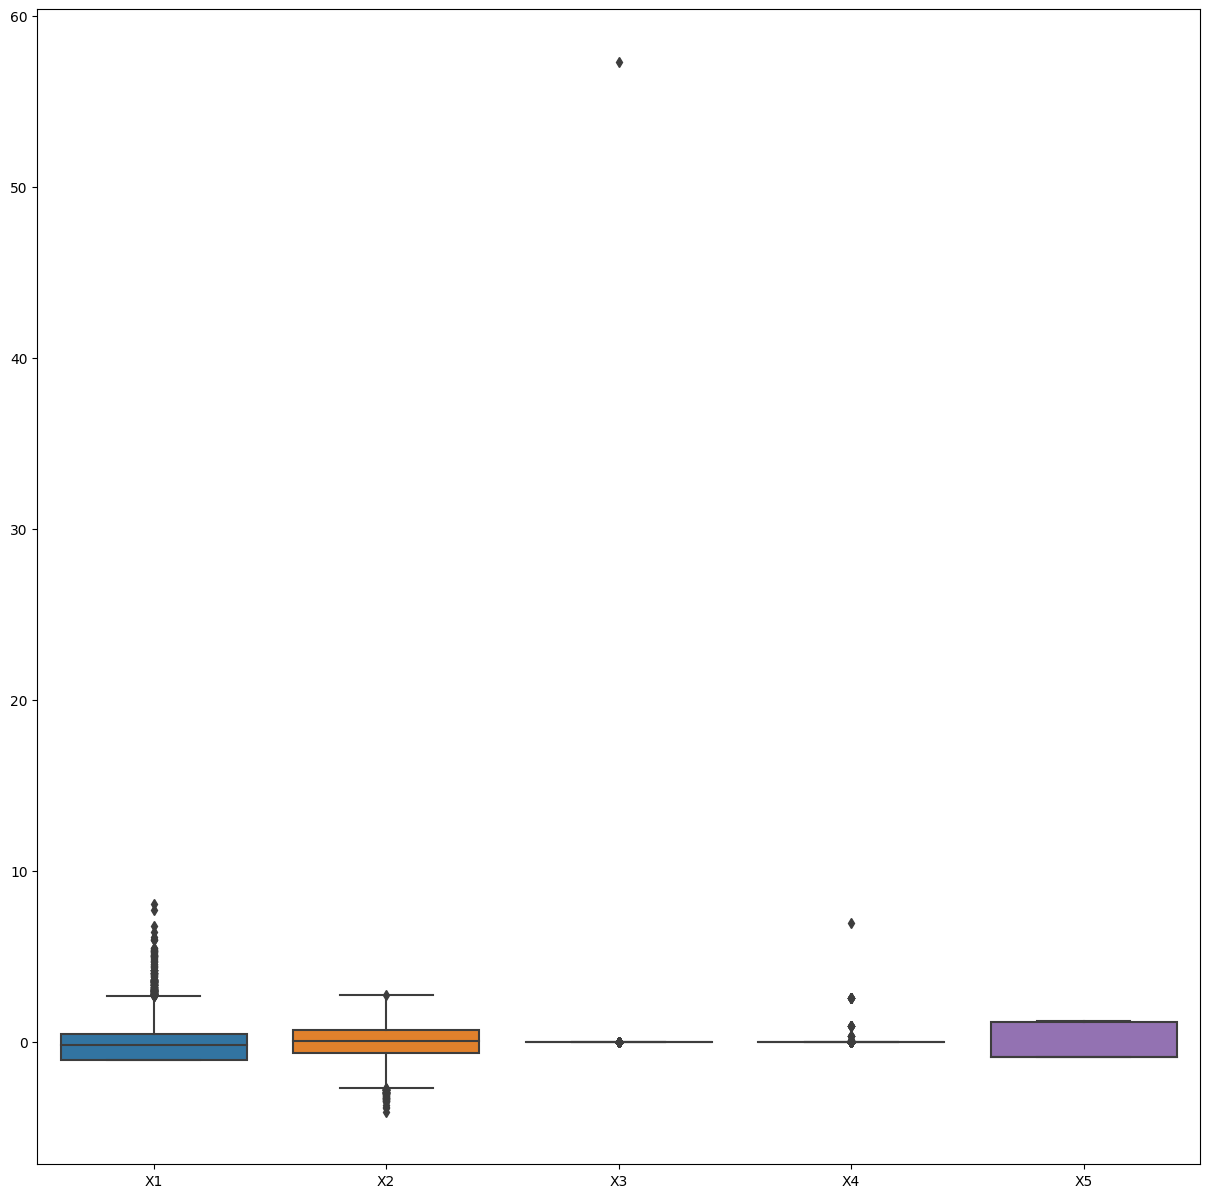

In [22]:
fig, ax = plt.subplots(figsize=(15,15))
sns.boxplot(data = X_test_norm, ax=ax)
plt.savefig("boxPlotTestData.jpg")

In [23]:
X_train_norm.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [24]:
y_train.info()
X_train_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  28000 non-null  object
dtypes: object(1)
memory usage: 218.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      28000 non-null  float64
 1   X2      28000 non-null  float64
 2   X3      28000 non-null  float64
 3   X4      28000 non-null  float64
 4   X5      28000 non-null  float64
dtypes: float64(5)
memory usage: 1.1 MB


In [25]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [26]:
import pandas as pd
import plotly.express as px

# Convert Series to DataFrame
y_train_df = y_train

# Make sure target column is integer (not object/string)
y_train_df['target'] = y_train_df['target'].astype(int)

# Count positive and negative tweets
one_count = y_train_df[y_train_df['target'] == 1].shape[0]
zero_count = y_train_df[y_train_df['target'] == 0].shape[0]

print("Positive:", one_count)
print("Negative:", zero_count)

# Pie chart
fig = px.pie(
    values=[one_count, zero_count],
    names=['Positive (1)', 'Negative (0)'],
    title='Distribution',
    opacity=0.9,
    template='simple_white'
)
fig.show()


Positive: 604
Negative: 27396


In [27]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Convert to 1D array
y_train_resampled = y_train_resampled.values.ravel()   # works even if DataFrame

# Check resampled class distribution
print("\nResampled class distribution:")
print(pd.Series(y_train_resampled).value_counts())



Resampled class distribution:
0    27396
1    27396
Name: count, dtype: int64


In [28]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
import xgboost as xgb

In [29]:
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",  
    eval_metric="logloss",  
    use_label_encoder=False,  
    n_estimators=200,  
    max_depth=6,  
    learning_rate=0.05,  
    subsample=0.8,  
    colsample_bytree=0.8,  
    random_state=42,  
    tree_method="hist",
    device="gpu"
)

In [30]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 3, 5],
    'lambda': [0, 1, 5]
}

In [31]:
r_model = RandomizedSearchCV(
    xgb.XGBClassifier(
        objective="binary:logistic", 
        eval_metric="logloss", 
        use_label_encoder=False,
        tree_method="hist",
        device="gpu"
    ),
    param_distributions=param_grid,
    n_iter=20,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)

In [32]:
r_model.fit(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [15:53:33] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [15:53:33] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [15:53:33] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [15:53:33] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [15:53:34] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device='gpu',
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learnin...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'lambda': [0, 1, 5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 500],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='f1', verbose=1)

In [33]:
best_model = r_model.best_estimator_

In [34]:
r_pred = best_model.predict(x_test)

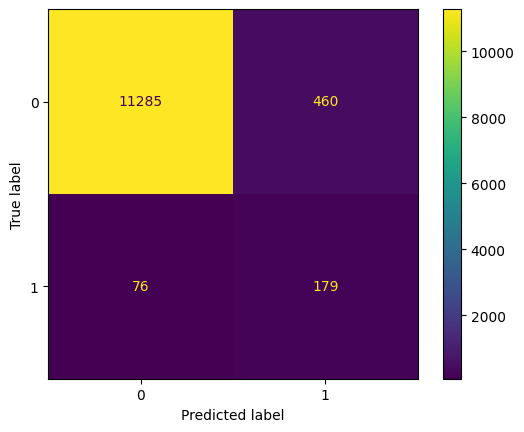

In [35]:

from sklearn.metrics import ConfusionMatrixDisplay

# Convert y_test to integers if it's string
y_test_int = y_test.astype(int)
r_pred_int = r_pred.astype(int)

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_int, r_pred_int)


In [36]:
print(classification_report(y_test_int, r_pred_int))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     11745
           1       0.28      0.70      0.40       255

    accuracy                           0.96     12000
   macro avg       0.64      0.83      0.69     12000
weighted avg       0.98      0.96      0.96     12000



In [37]:
from sklearn.metrics import accuracy_score



accuracy = accuracy_score(y_test_int, r_pred_int)
print("Accuracy:", accuracy)


Accuracy: 0.9553333333333334


In [38]:
submission = pd.DataFrame({
    'ID': test['ID'].values,
}) 
preds = r_model.predict(test.drop(['Date', 'ID'], axis=1))
submission['target'] = preds
submission.head()

,ID,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [39]:
submission.to_csv('submission.csv', index=False)